In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

In [181]:
auto_mpg_df = pd.read_table('auto-mpg.data-original.csv', delimiter=',').dropna()
auto_mpg_df.head()

,MPG,Cylinders,Displacement,horsepower,Weight,Acceleration,Model_Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [182]:
auto_mpg_df['Displacement'] = np.log(auto_mpg_df['Displacement'])
auto_mpg_df['Weight'] = np.log(auto_mpg_df['Weight'])
auto_mpg_df['MPG'] = np.log(auto_mpg_df['MPG'])
#auto_mpg_df['horsepower'] = np.log(auto_mpg_df['horsepower'])

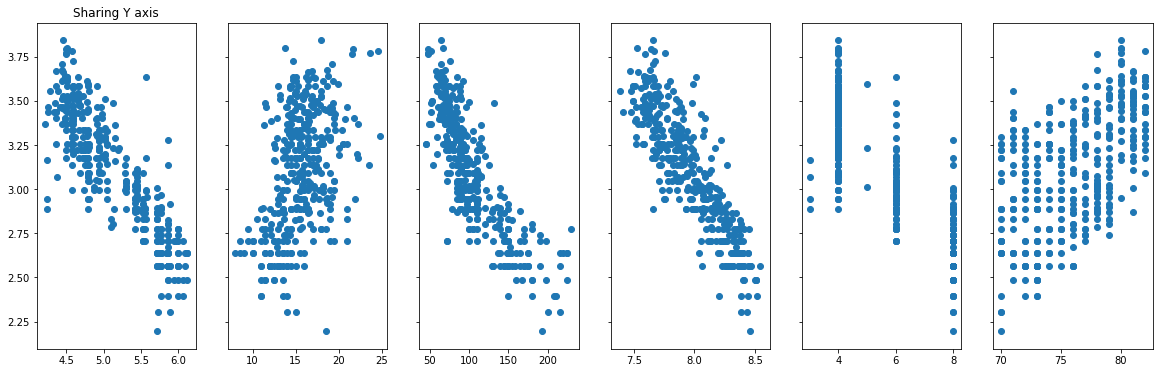

In [183]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize=(20,6))
ax1.scatter(auto_mpg_df['Displacement'], auto_mpg_df['MPG'])
ax1.set_title('Sharing Y axis')
ax2.scatter(auto_mpg_df['Acceleration'], auto_mpg_df['MPG'])
ax3.scatter(auto_mpg_df['horsepower'], auto_mpg_df['MPG'])
ax4.scatter(auto_mpg_df['Weight'], auto_mpg_df['MPG'])
ax5.scatter(auto_mpg_df['Cylinders'], auto_mpg_df['MPG'])
ax6.scatter(auto_mpg_df['Model_Year'], auto_mpg_df['MPG'])
plt.show()

In [184]:
#Drop all the cylinder 3 and 5 data because we don't have enough of them to make good prediction for them
cy5 = auto_mpg_df[auto_mpg_df['Cylinders'] == 5]
cy3 = auto_mpg_df[auto_mpg_df['Cylinders'] == 3]
cytodrop = pd.concat([cy3, cy5])
cyindex = cytodrop.index.values
auto_mpg_df = auto_mpg_df.drop(cyindex)

In [185]:
X_noDummie = auto_mpg_df.drop(['MPG', 'Car Name'], 1)
y_noDummie = auto_mpg_df['MPG']

X_train, X_test, y_train, y_test = train_test_split(X_noDummie, y_noDummie, test_size=0.2, random_state=20)
X_noDummie.head()

,Cylinders,Displacement,horsepower,Weight,Acceleration,Model_Year,Origin
0,8,5.726848,130.0,8.161660,12.0,70,1
1,8,5.857933,165.0,8.214194,11.5,70,1
2,8,5.762051,150.0,8.142063,11.0,70,1
3,8,5.717028,150.0,8.141190,12.0,70,1
4,8,5.710427,140.0,8.145840,10.5,70,1


In [186]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, y_test))
print(regr.score(X_train, y_train))

#Looks very good
cross_val_score(regr, X_test, y_test, cv=5)


Coefficients: 
 [-0.01040565 -0.06630147 -0.00086417 -0.65965131 -0.00669546  0.02909253
  0.02117467]

Intercept: 
 6.70094791391

R-squared:
0.893746954516
0.897239812602


array([ 0.8957036 ,  0.85966504,  0.85895265,  0.90582097,  0.69742817])

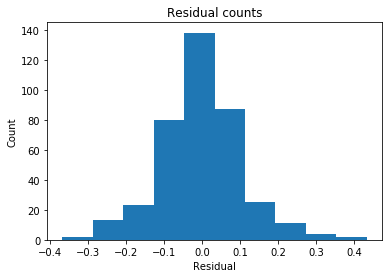

In [187]:
# Extract predicted values.
predicted = regr.predict(X_noDummie).ravel()
actual = y_noDummie

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

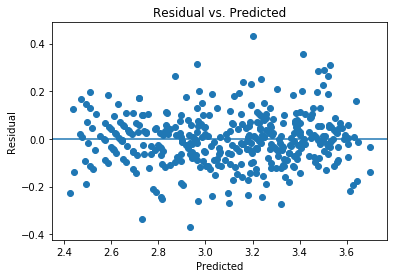

In [188]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [189]:
# Create a set of dummy variables from the sex variable
df_Cylinders = pd.get_dummies(auto_mpg_df['Cylinders'])
#df_Model_Year = pd.get_dummies(auto_mpg_df['Model_Year'])
df_Origin = pd.get_dummies(auto_mpg_df['Origin'])

# Join the dummy variables to the main dataframe
auto_mpg_df = pd.concat([auto_mpg_df, df_Cylinders, df_Origin], axis=1)
auto_mpg_df = auto_mpg_df.drop(['Cylinders', 'Origin'], 1).drop('Car Name', 1)
auto_mpg_df.head()

,MPG,Displacement,horsepower,Weight,Acceleration,Model_Year,4,6,8,1,2,3
0,2.890372,5.726848,130.0,8.161660,12.0,70,0,0,1,1,0,0
1,2.708050,5.857933,165.0,8.214194,11.5,70,0,0,1,1,0,0
2,2.890372,5.762051,150.0,8.142063,11.0,70,0,0,1,1,0,0
3,2.772589,5.717028,150.0,8.141190,12.0,70,0,0,1,1,0,0
4,2.833213,5.710427,140.0,8.145840,10.5,70,0,0,1,1,0,0


In [192]:
X = auto_mpg_df.drop('MPG', 1)
y = auto_mpg_df['MPG']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=20)

In [193]:
regr = linear_model.LinearRegression()
regr.fit(X_train2, y_train2)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test2, y_test2))
print(regr.score(X_train2, y_train2))

#Looks very good
cross_val_score(regr, X_test2, y_test2, cv=5)


Coefficients: 
 [-0.00345206 -0.00120138 -0.68214462 -0.00587042  0.02929305  0.04377663
 -0.0263156  -0.01746103 -0.02675779  0.00781511  0.01894269]

Intercept: 
 6.54000573479

R-squared:
0.89580214971
0.898872689913


array([ 0.90176809,  0.8399962 ,  0.86065586,  0.90211662,  0.70083519])

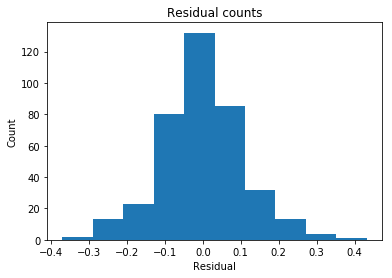

In [154]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

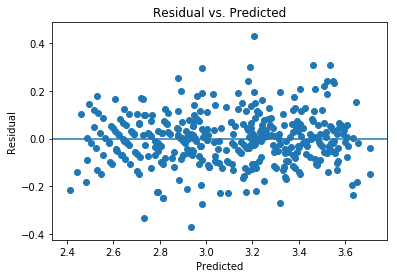

In [155]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [127]:
# ###### High multi-corrilation, applying PCA
# Standardizing the features
X_pca = auto_mpg_df.drop('MPG', 1)
X_pca = pd.DataFrame(StandardScaler().fit_transform(X_pca))

pca = PCA(n_components=0.90, svd_solver='full')
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents)
#principalDf.columns = ['zero','one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen']
#principalDf['MPG'] = auto_mpg_df['MPG']
principalDf.head()

,0,1,2,3
0,2.827405,0.355033,0.882182,0.766839
1,3.342052,0.359985,1.129024,0.534589
2,3.093868,0.339779,1.170745,0.579552
3,2.959646,0.356768,0.990720,0.702570
4,3.023696,0.330796,1.215379,0.563102


In [128]:
X_cpa = principalDf
y_cpa = auto_mpg_df['MPG']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_cpa, y_cpa, test_size=0.2)

In [129]:
regr = linear_model.LinearRegression()
regr.fit(X_train3, y_train3)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test3, y_test3))
print(regr.score(X_train3, y_train3))

#Looks very good
cross_val_score(regr, X_test3, y_test3, cv=5)


Coefficients: 
 [-0.13378633 -0.04205017 -0.03724329 -0.06184385]

Intercept: 
 3.09766857668

R-squared:
0.822853694437
0.84230699029


array([ 0.74591049,  0.87838447,  0.84880955,  0.86584938,  0.42657682])